In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [2]:
inequality = pd.read_csv("INCOME INEQUALITY EUROPE 2006-2016.csv")

In [3]:
inequality.head()

,country,year,demox_eiu,gdp,tax_%_gdp,tax_rev,gini_index,gini_index_round,gini_index2
0,Albania,2011,58.1,10200,18.0,1836.0,2.93,3,29.3
1,Albania,2012,56.7,10400,17.5,1820.0,2.91,3,29.1
2,Albania,2013,56.7,10500,16.5,1732.5,2.90,3,29.0
3,Albania,2014,56.7,10700,18.3,1958.1,2.90,3,29.0
4,Albania,2015,59.1,11000,18.5,2035.0,2.90,3,29.0


# ANALYSIS OF DATA

GDP PER CAPITA

In [4]:
countryy=inequality['country']
countries=countryy.unique()

In [5]:
inequality_by_gdp=pd.DataFrame(columns=["country","gdp"])
for i in range(len(inequality)):
    if inequality.loc[i,"country"] in countries:
        inequality_by_gdp=inequality_by_gdp.append(inequality.loc[i])

inequality_by_gdp['gdp']=inequality_by_gdp['gdp'].astype('float64')

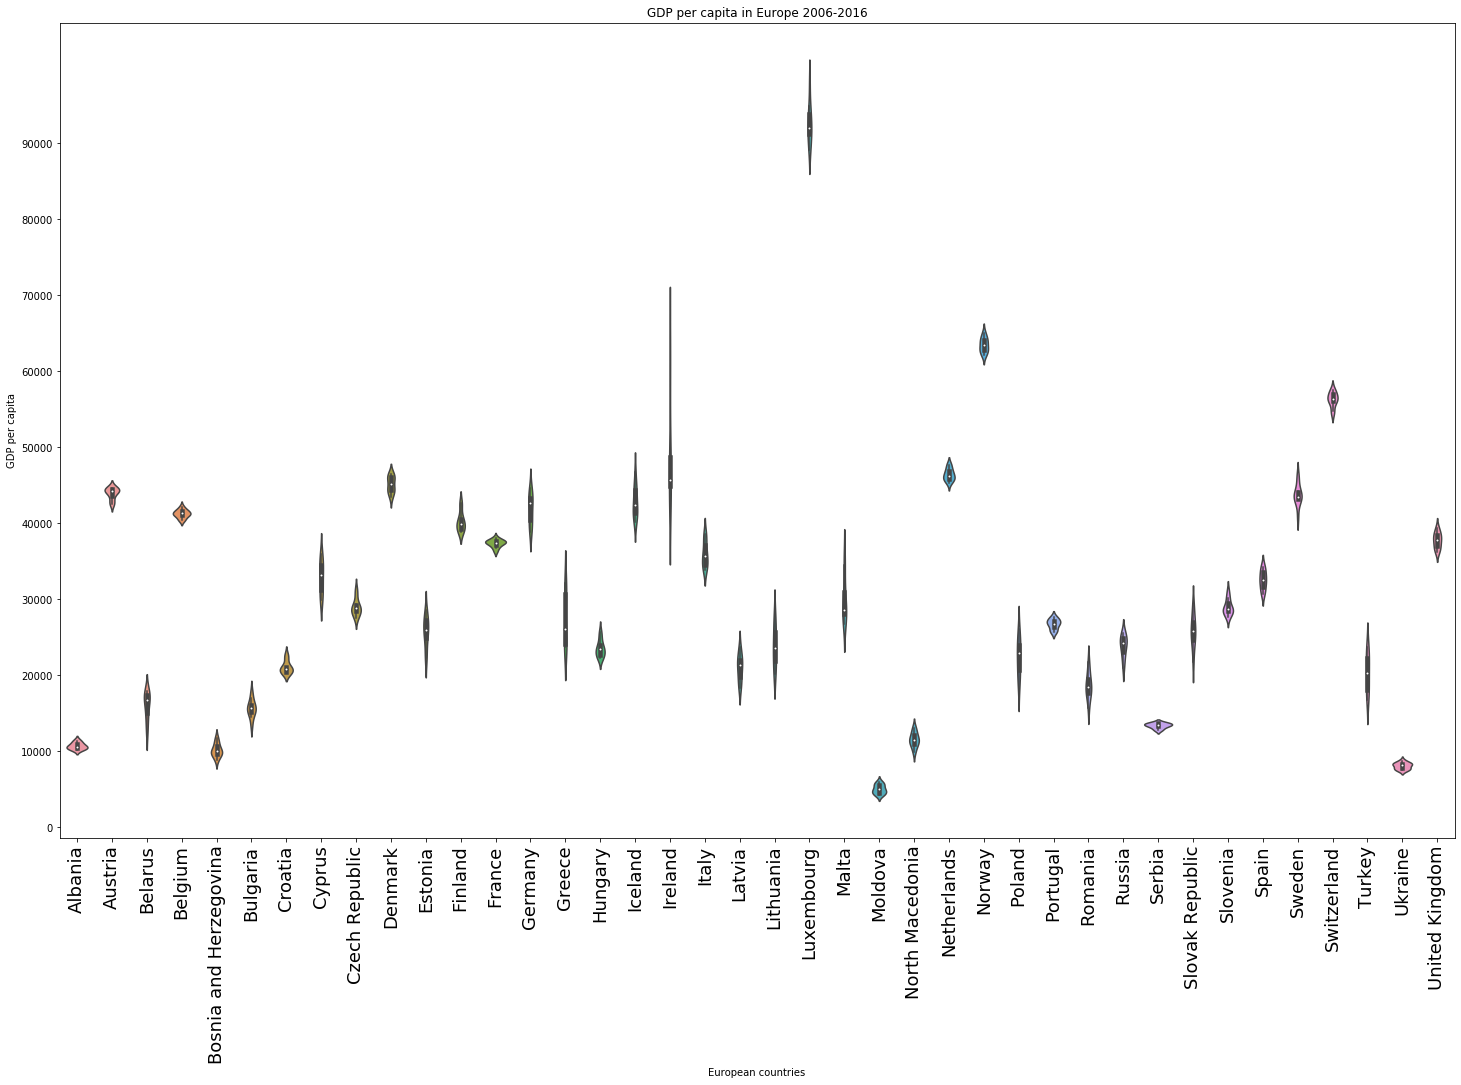

In [6]:
plt.figure(figsize=(25,15))
ax = sns.violinplot(x="country", y="gdp", data=inequality_by_gdp)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(np.arange(0, 100000, 10000))
ax.set_title('GDP per capita in Europe 2006-2016')
ax.set_ylabel('GDP per capita')
ax.set_xlabel('European countries')
plt.show()


In [7]:
inequality_ordered=inequality.groupby('country').gdp.describe().sort_values(by=['mean'], ascending=False)
inequality_ordered

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Luxembourg,11.0,92490.909091,2523.669767,89100.0,91200.0,92000.0,93800.0,97900.0
Norway,11.0,63481.818182,953.748585,62100.0,62800.0,63400.0,64100.0,65100.0
Switzerland,11.0,56300.000000,972.625313,54500.0,56050.0,56300.0,57000.0,57600.0
Ireland,11.0,48672.727273,6714.475543,42900.0,44850.0,45700.0,48750.0,62800.0
Netherlands,11.0,46436.363636,796.583614,45300.0,45850.0,46200.0,46900.0,47700.0
Denmark,11.0,45145.454545,1069.919283,43400.0,44350.0,45100.0,46050.0,46500.0
Austria,11.0,43945.454545,767.285653,42500.0,43600.0,44300.0,44450.0,44700.0
Sweden,11.0,43763.636364,1418.642116,40900.0,43200.0,43500.0,44150.0,46300.0
Iceland,11.0,42800.000000,2045.482828,40100.0,41300.0,42400.0,44400.0,46800.0


In [8]:
country_top_gdp=['Luxembourg','Norway', 'Switzerland','Ireland', 'Netherlands', 'Denmark','Austria', 'Sweden', 'Iceland', 'Germany', 'Belgium','Finland', 'United Kingdom']
ineq_top_gdp=pd.DataFrame(columns=["country","year","demox_eiu","gdp","tax_%_gdp","gini_index"])
for i in range(len(inequality)):
    if inequality.loc[i,"country"] in country_top_gdp:
        ineq_top_gdp=ineq_top_gdp.append(inequality.loc[i])

In [9]:
country_top_gdp_2=['France','Italy', 'Cyprus', 'Spain', 'Malta', 'Czech Republic', 'Slovenia','Greece', 'Portugal', 'Slovak Republic','Estonia','Russia', 'Lithuania']
ineq_top_gdp_2=pd.DataFrame(columns=["country","year","demox_eiu","gdp","tax_%_gdp","gini_index"])
for i in range(len(inequality)):
    if inequality.loc[i,"country"] in country_top_gdp_2:
        ineq_top_gdp_2=ineq_top_gdp_2.append(inequality.loc[i])

In [10]:
country_top_gdp_3=['Hungary', 'Poland', 'Croatia','Latvia', 'Turkey','Romania', 'Belarus','Bulgaria', 'Serbia', 'North Macdeonia', 'Albania', 'Bosnia and Herzegovina', 'Ukraine','Moldova']
ineq_top_gdp_3=pd.DataFrame(columns=["country","year","demox_eiu","gdp","tax_%_gdp","gini_index"])
for i in range(len(inequality)):
    if inequality.loc[i,"country"] in country_top_gdp_3:
        ineq_top_gdp_3=ineq_top_gdp_3.append(inequality.loc[i])

In [11]:
ineq_top_gdp['gdp']=ineq_top_gdp['gdp'].astype('float64')
ineq_top_gdp_2['gdp']=ineq_top_gdp_2['gdp'].astype('float64')
ineq_top_gdp_3['gdp']=ineq_top_gdp_3['gdp'].astype('float64')

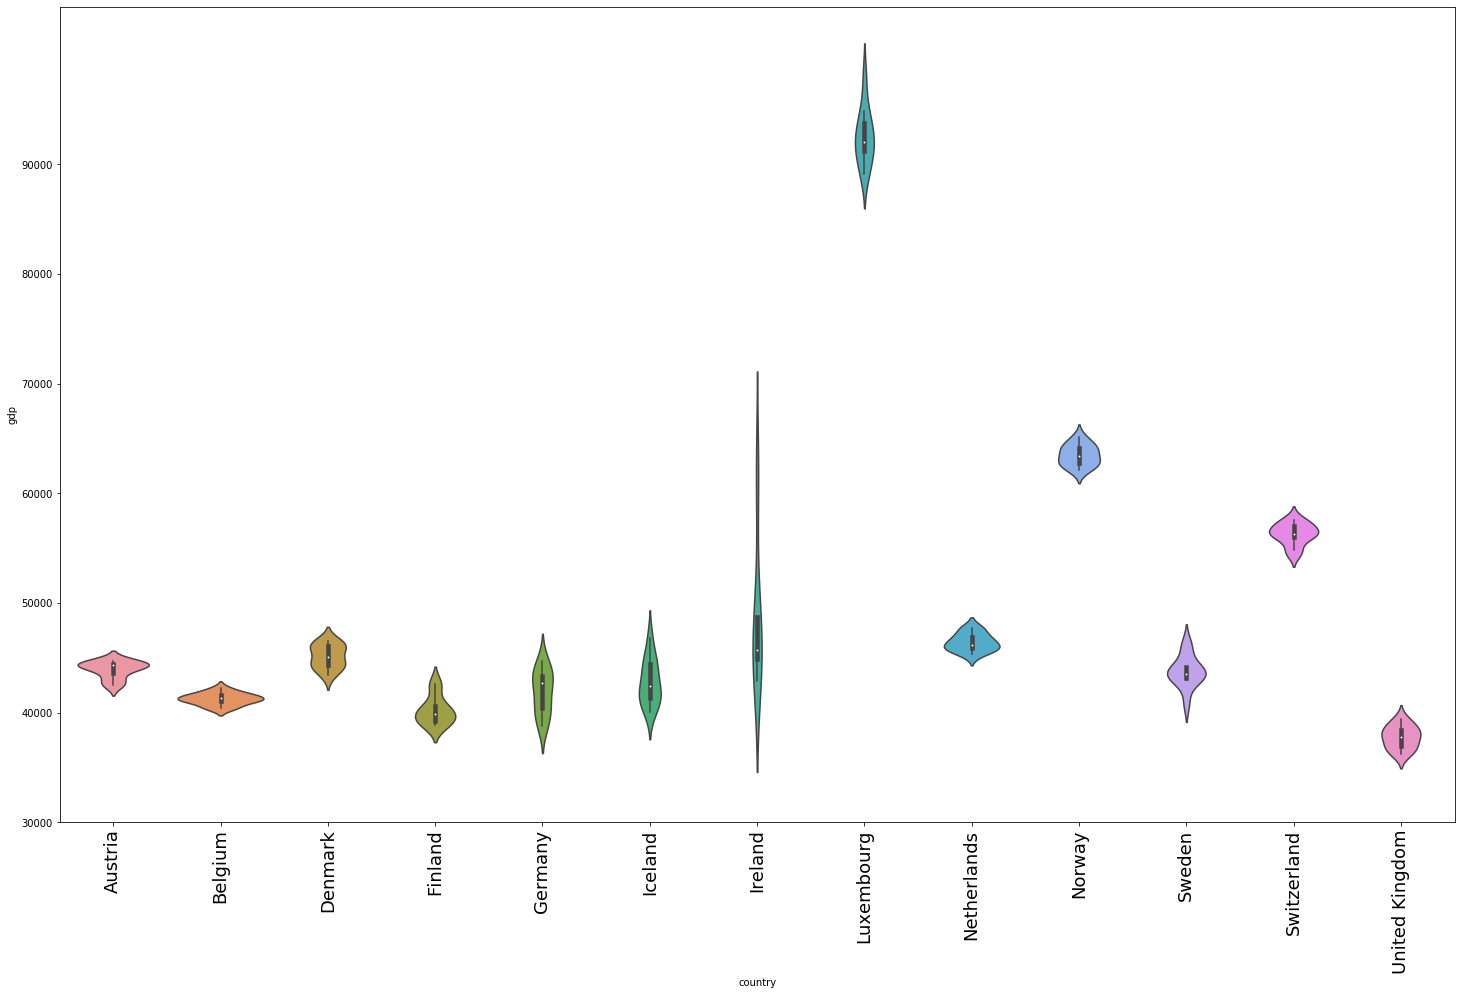

In [12]:
#TOP EU'S GDP PER CAPITA
plt.figure(figsize=(25,15))
ax = sns.violinplot(x="country", y="gdp", data=ineq_top_gdp)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(np.arange(30000, 100000, 10000))
plt.show()


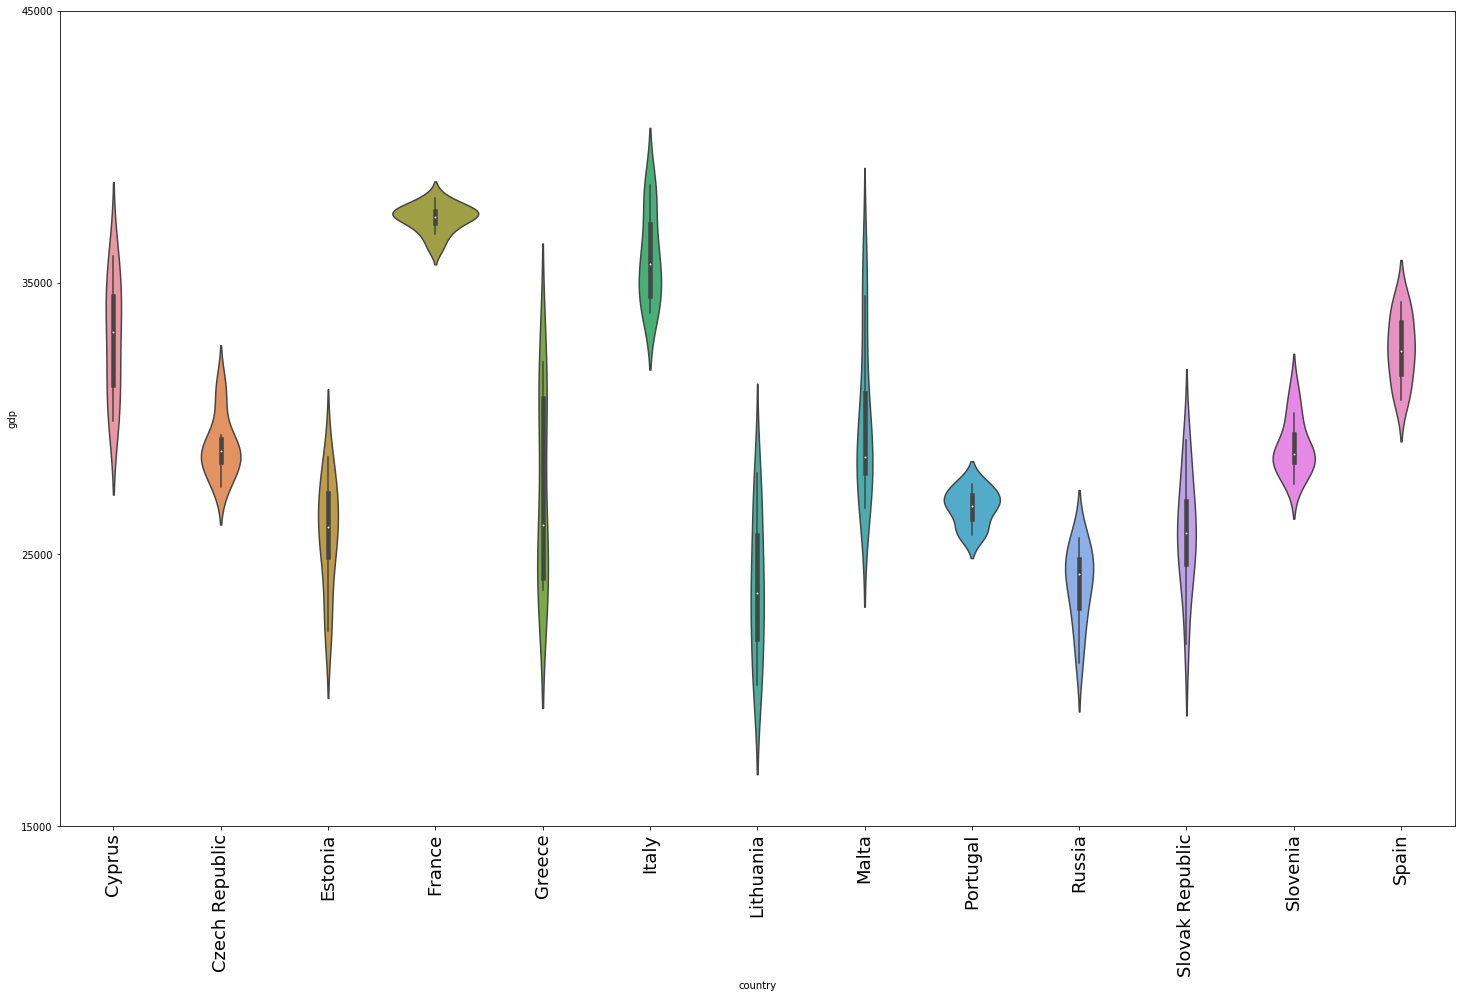

In [13]:
#MIDDLE EU GDP'S PER CAPITA
plt.figure(figsize=(25,15))
ax = sns.violinplot(x="country", y="gdp", data=ineq_top_gdp_2)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(np.arange(15000, 50000, 10000))
plt.show()


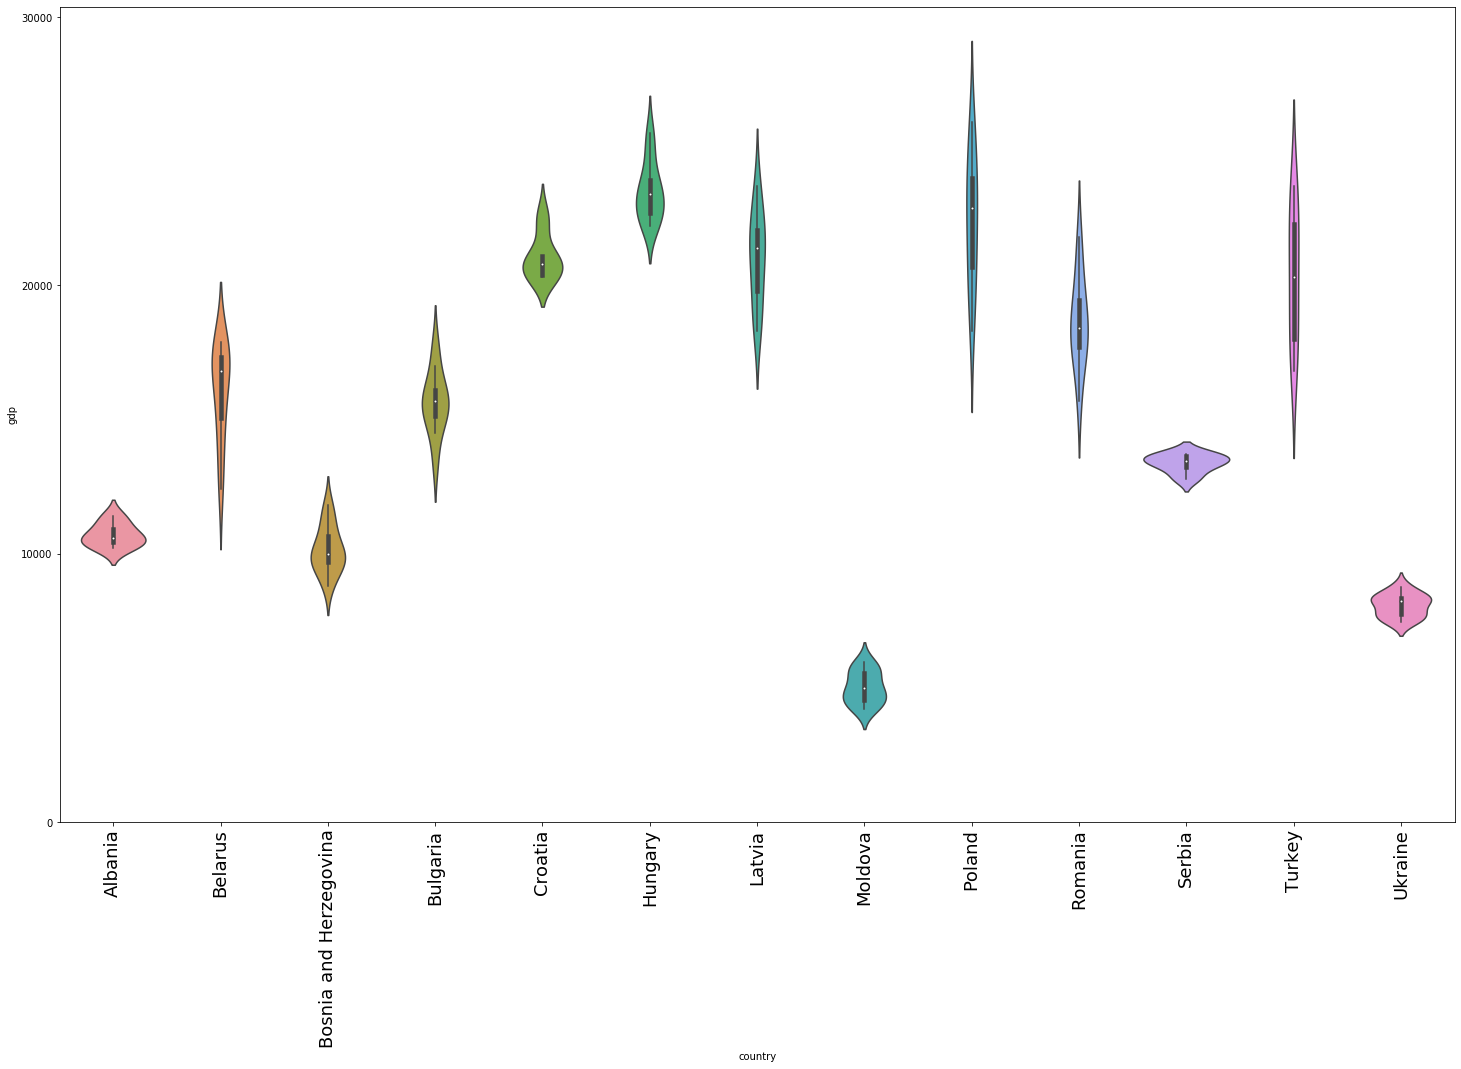

In [14]:
#LOWEST EU GDP PER CAPITA
plt.figure(figsize=(25,15))
ax = sns.violinplot(x="country", y="gdp", data=ineq_top_gdp_3)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(np.arange(0, 40000, 10000))
plt.show()


GINI INDEX

In [15]:
inequality_by_gini=pd.DataFrame(columns=["country","gini_index"])
for i in range(len(inequality)):
    if inequality.loc[i,"country"] in countries:
        inequality_by_gini=inequality_by_gini.append(inequality.loc[i])

inequality_by_gini['gini_index']=inequality_by_gini['gini_index'].astype('float64')

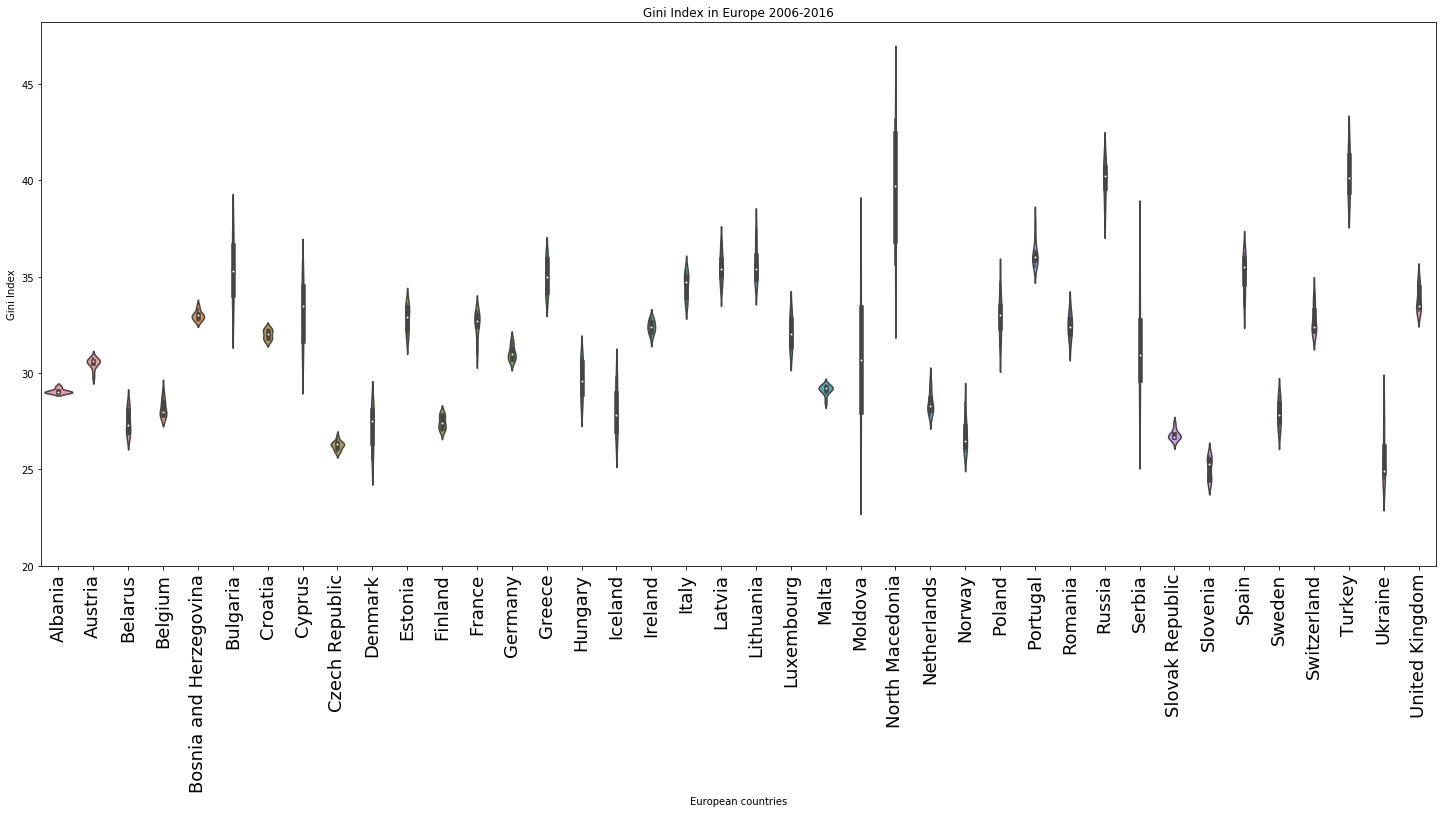

In [16]:
plt.figure(figsize=(25,10))
ax = sns.violinplot(x="country", y="gini_index", data=inequality_by_gini)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(np.arange(20,50,5))
ax.set_title('Gini Index in Europe 2006-2016')
ax.set_ylabel('Gini Index')
ax.set_xlabel('European countries')
plt.show()


TAX REVENUE

In [17]:
inequality_by_tax_rev_perc=pd.DataFrame(columns=["country","tax_%_gdp"])
for i in range(len(inequality)):
    if inequality.loc[i,"country"] in countries:
        inequality_by_tax_rev_perc=inequality_by_tax_rev_perc.append(inequality.loc[i])

inequality_by_tax_rev_perc['tax_%_gdp']=inequality_by_tax_rev_perc['tax_%_gdp'].astype('float64')

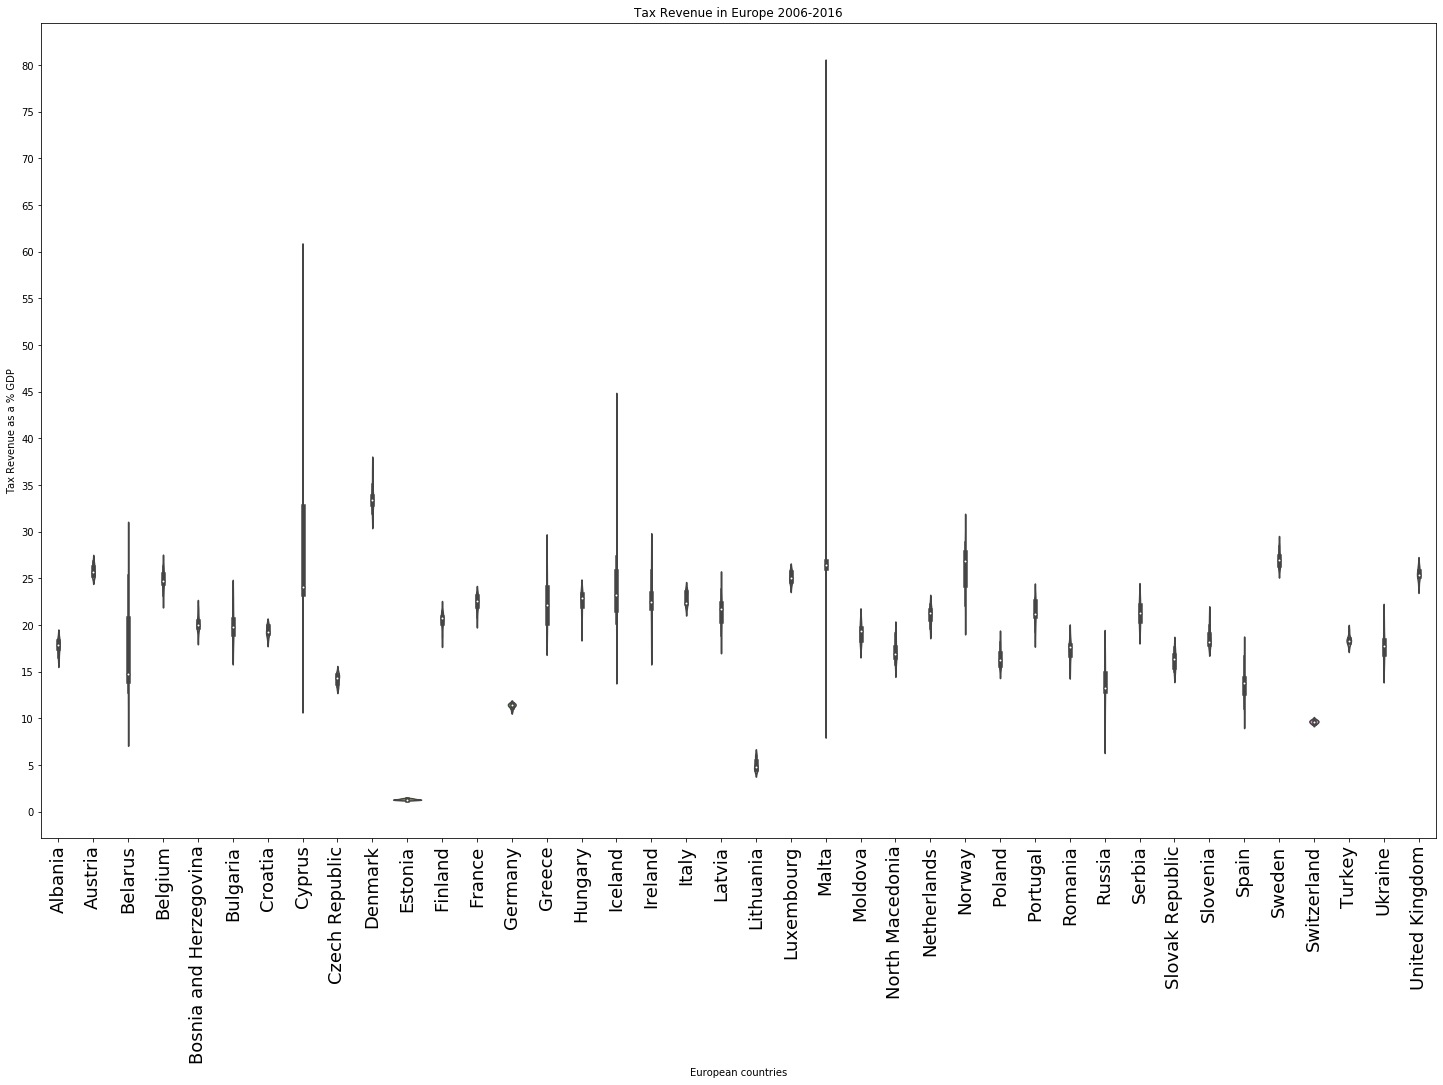

In [18]:
plt.figure(figsize=(25,15))
ax = sns.violinplot(x="country", y="tax_%_gdp", data=inequality_by_tax_rev_perc)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(np.arange(0,85,5))
ax.set_title('Tax Revenue in Europe 2006-2016')
ax.set_ylabel('Tax Revenue as a % GDP')
ax.set_xlabel('European countries')
plt.show()

In [19]:
inequality_by_tax_rev=pd.DataFrame(columns=["country","tax_rev"])
for i in range(len(inequality)):
    if inequality.loc[i,"country"] in countries:
        inequality_by_tax_rev=inequality_by_tax_rev.append(inequality.loc[i])

inequality_by_tax_rev['tax_rev']=inequality_by_tax_rev['tax_rev'].astype('float64')

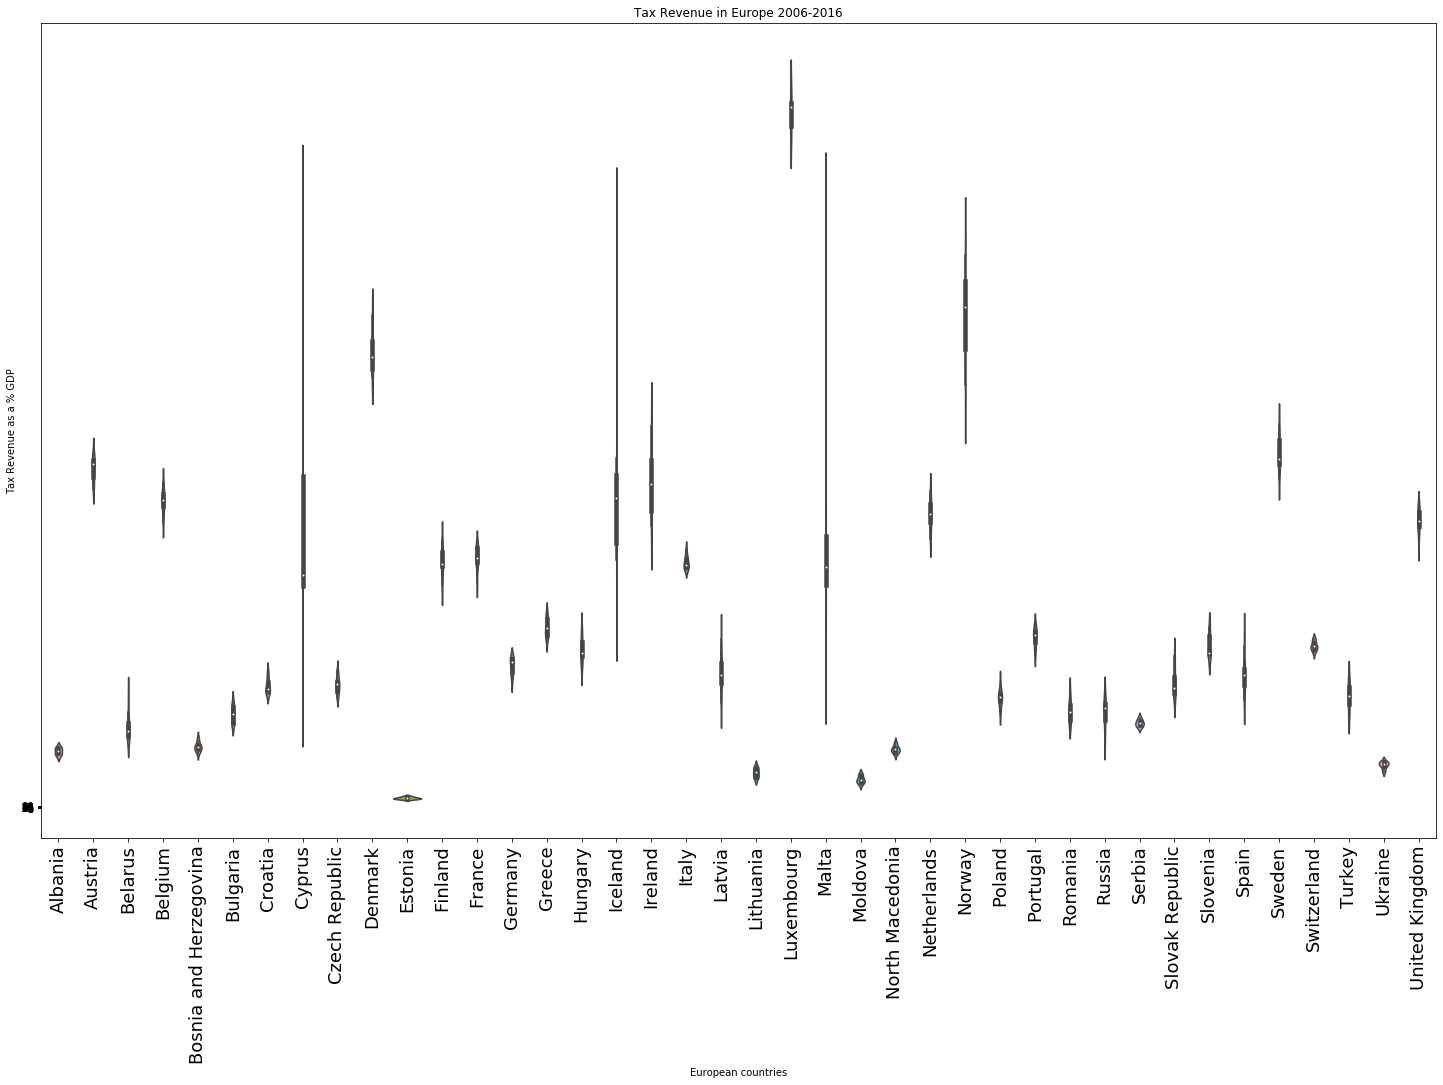

In [20]:
plt.figure(figsize=(25,15))
ax = sns.violinplot(x="country", y="tax_rev", data=inequality_by_tax_rev)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(np.arange(0,85,5))
ax.set_title('Tax Revenue in Europe 2006-2016')
ax.set_ylabel('Tax Revenue as a % GDP')
ax.set_xlabel('European countries')
plt.show()

DEMOCRACY INDEX

In [21]:
inequality_by_demox=pd.DataFrame(columns=["country","demox_eiu"])
for i in range(len(inequality)):
    if inequality.loc[i,"country"] in countries:
        inequality_by_demox=inequality_by_demox.append(inequality.loc[i])

inequality_by_demox['demox_eiu']=inequality_by_demox['demox_eiu'].astype('float64')

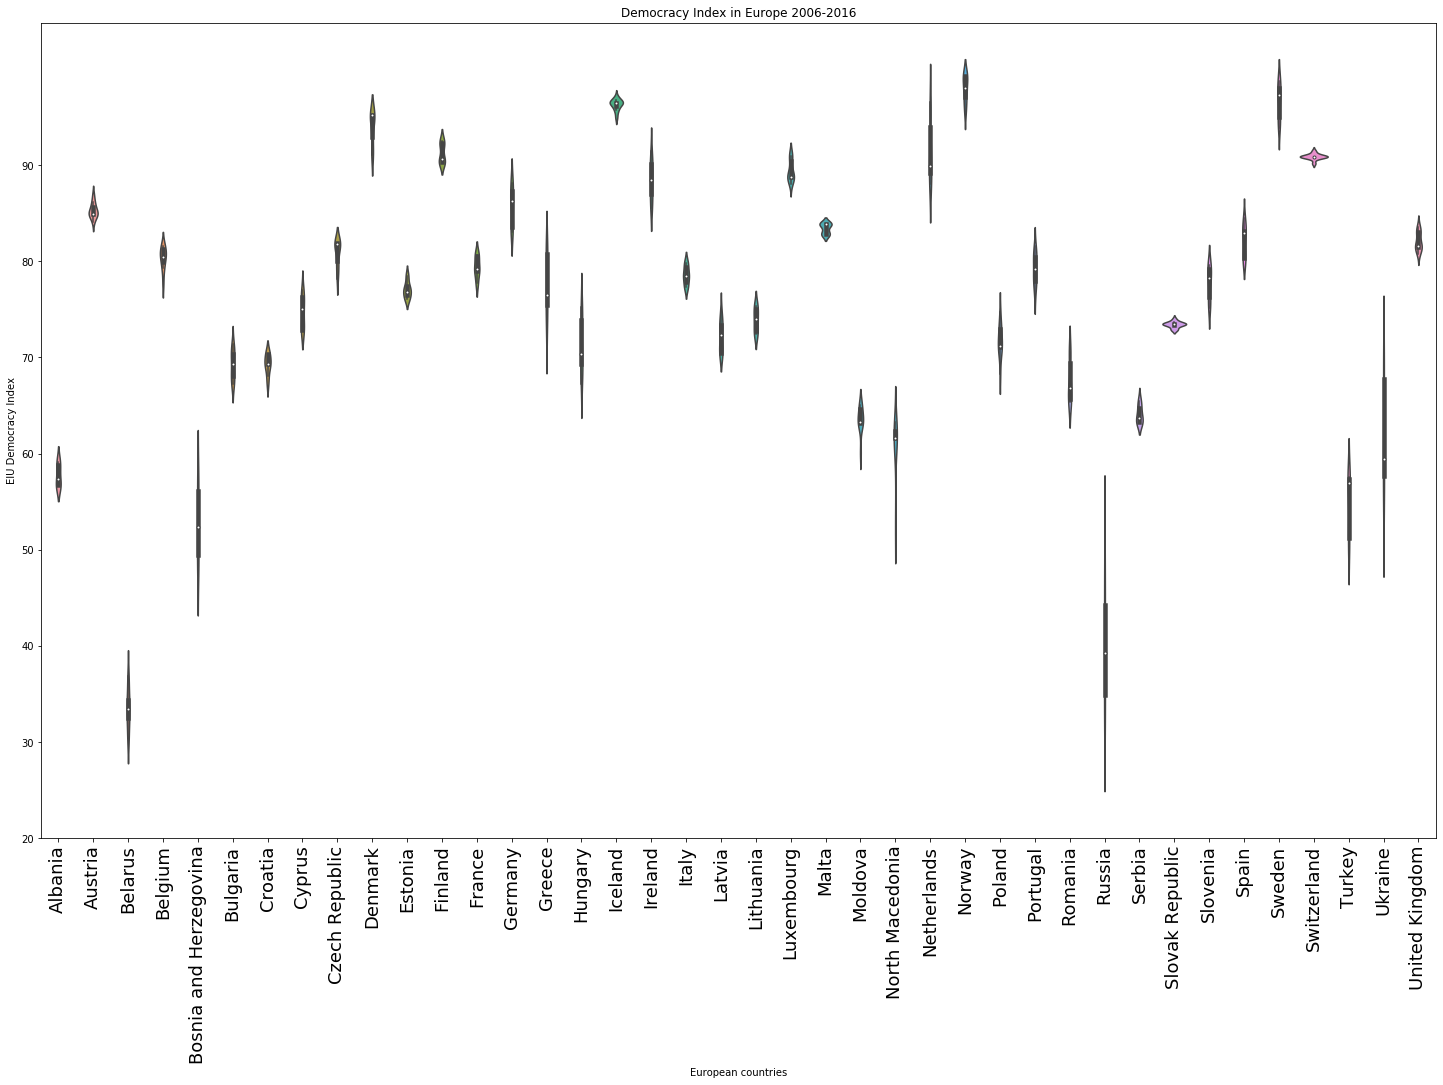

In [22]:
plt.figure(figsize=(25,15))
ax = sns.violinplot(x="country", y="demox_eiu", data=inequality_by_demox)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(np.arange(20,100,10))
ax.set_title('Democracy Index in Europe 2006-2016')
ax.set_ylabel('EIU Democracy Index')
ax.set_xlabel('European countries')
plt.show()

HEAT MAP 

In [23]:
heatmap_ = inequality.drop(["tax_%_gdp","year"], axis=1)

In [24]:
corr=heatmap_.corr()

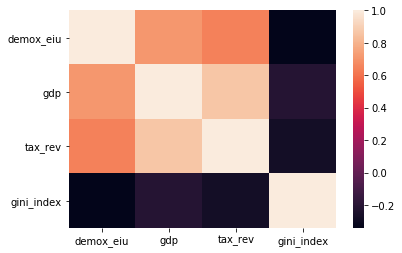

In [25]:
sns.heatmap(corr)
plt.show()

# UNSUPERVISED - CLUSTERING

AGGLOMERATIVE CLUSTERING

In [26]:
X = inequality.values[:, 1:6]
Y = inequality.values[:,0]

In [27]:
from sklearn.preprocessing import scale
from sklearn import metrics
scaled_data = scale(X)

In [28]:
from sklearn import cluster
from sklearn.preprocessing import LabelEncoder
n_samples, n_features = scaled_data.shape
n_digits = len(np.unique(Y))
Y2 = LabelEncoder().fit_transform(Y)
model = cluster.AgglomerativeClustering(n_clusters=n_digits, linkage="average",
affinity="cosine")
model.fit(scaled_data)
print(Y2)
print(model.labels_)
print(metrics.silhouette_score(scaled_data, model.labels_))
print(metrics.completeness_score(Y2, model.labels_))
print(metrics.homogeneity_score(Y2, model.labels_))


[ 0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2
  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9
  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11
 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13
 13 13 13 14 14 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15
 15 16 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 17 17 18
 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 19 20 20 20
 20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 21 21 21 22 22 22 22 22
 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23 23 25 25 25 25 25 25 25
 25 25 25 25 24 24 24 24 24 24 24 24 24 24 24 26 26 26 26 26 26 26 26 26
 26 26 27 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28 28 28 28
 29 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30

In [29]:
silhouette_scores=[]
completeness_scores=[]
homogeneity_scores=[]
labels = []
aff = ["euclidean", "l1", "l2", "manhattan", "cosine"]
link = ["ward", "complete", "average"]
for a in aff:
    for l in link:
        if(l=="ward" and a!="euclidean"):
            continue
    else:
        label= (a+" "+l)
        labels.append(label)
        print(a,l)
        model = cluster.AgglomerativeClustering(n_clusters=n_digits, linkage=l, affinity=a)
        model.fit(scaled_data)
        silhouette_score=(metrics.silhouette_score(scaled_data, model.labels_))
        print (silhouette_score)
        silhouette_scores.append(silhouette_score)
        completeness_score= (metrics.completeness_score(Y2, model.labels_))
        print(completeness_score)
        completeness_scores.append(completeness_score)
        homogeneity_score=(metrics.homogeneity_score(Y2, model.labels_))
        print(homogeneity_score)
        homogeneity_scores.append(homogeneity_score)

euclidean average
0.27776924099733713
0.6980545639427895
0.6365017443653597
l1 average
0.2553368835834679
0.7424354055677306
0.7003572912868454
l2 average
0.27776924099733713
0.6980545639427895
0.6365017443653597
manhattan average
0.2553368835834679
0.7424354055677306
0.7003572912868454
cosine average
0.12505171859525877
0.6419616404675507
0.5852703422840284


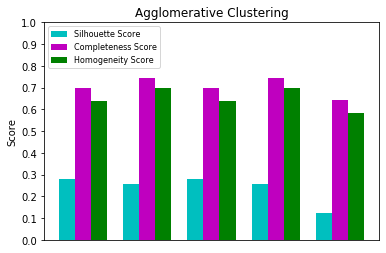

<Figure size 2880x1080 with 0 Axes>

In [50]:
Labels2 = (labels)
y_pos=np.arange(len(labels))
L = np.arange(len(silhouette_scores))
plt.bar(L + 0.00, silhouette_scores, color = 'c', width=0.25, label= 'Silhouette Score')
plt.bar(L + 0.25, completeness_scores, color = 'm', width=0.25, label= 'Completeness Score')
plt.bar(L + 0.50, homogeneity_scores, color = 'g', width=0.25, label= 'Homogeneity Score')
plt.xticks(y_pos, labels, rotation='vertical')
plt.yticks(np.arange(0,1.1,0.1))
plt.legend(loc="upper left", fontsize=8)
plt.ylabel("Score")
plt.title("Agglomerative Clustering")
plt.figure(figsize=(40,15))
plt.show()

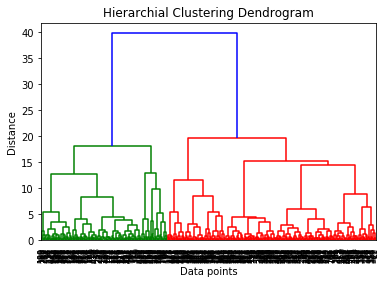

In [67]:
from scipy.cluster.hierarchy import dendrogram, linkage
model = linkage(scaled_data, 'ward')
plt.title("Hierarchial Clustering Dendrogram")
plt.ylabel("Distance")
plt.xticks(rotation='vertical')
plt.xlabel("Data points")
dendrogram(model, leaf_rotation=90, leaf_font_size=8)
plt.show()

K MEANS CLUSTERING

In [31]:
silhouette_scores2=[]
completeness_scores2=[]
homogeneity_scores2=[]
labels = []
k_clusters=[]
n_samples, n_features = scaled_data.shape
n_digits = len(np.unique(Y))
Y2 = LabelEncoder().fit_transform(Y)
for k in range(2, 20):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    print(k)
    k_clusters.append(k)
    silhouette_score2 = (metrics.silhouette_score(scaled_data, kmeans.labels_))
    print(silhouette_score2)
    silhouette_scores2.append(silhouette_score2)
    completeness_score2=metrics.completeness_score(Y2, kmeans.labels_)
    print (completeness_score2)
    completeness_scores2.append(completeness_score2)
    homogeneity_score2=(metrics.homogeneity_score(Y2, kmeans.labels_))
    print (homogeneity_score2)
    homogeneity_scores2.append(homogeneity_score2)
    
    

2
0.33880965755918857
0.9735868716599153
0.1781015628050574
3
0.2779171438595239
0.8700207385415645
0.22654761907580712
4
0.25483328693094087
0.6099476423519268
0.21746418141514698
5
0.2816579791947165
0.7112695470607318
0.2961857635761361
6
0.28172540427031995
0.6646010251751813
0.3115877543205865
7
0.2819434836202282
0.6941053470746211
0.35485958220220676
8
0.2962548189394468
0.6831519145951743
0.3575134191592916
9
0.3195024671086909
0.6951513482586422
0.383007398976822
10
0.31174783001302636
0.6891806094470868
0.39545875674726355
11
0.3075280871202125
0.7188603787438984
0.43370183738268114
12
0.30117531179593204
0.7281426543435655
0.4575684172549657
13
0.2978995977921549
0.7068330420849892
0.4565995168365129
14
0.30010426663817613
0.7019760559575041
0.4640258572021631
15
0.2898249445705999
0.669419469144166
0.468496517707903
16
0.2701774313833428
0.6673040971309647
0.4862180213236571
17
0.2911880916232107
0.6597905997389433
0.48305001663293834
18
0.2920097912164835
0.647279152658542

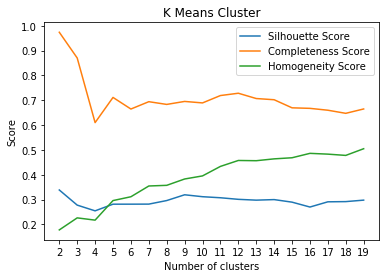

<Figure size 2880x2880 with 0 Axes>

In [49]:
# line 1 points
x1 = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
y1 = np.array(silhouette_scores2)
# plotting the line 1 points 
plt.plot(x1, y1, label = "Silhouette Score")
# line 2 points
x2 = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
y2 = np.array(completeness_scores2)
# plotting the line 2 points 
plt.plot(x2, y2, label = "Completeness Score")
# line 3 points
x3 = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
y3 = np.array(homogeneity_scores2)
# plotting the line 3 points 
plt.plot(x3, y3, label = "Homogeneity Score")
plt.xticks(np.arange(2,20,1))
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('K Means Cluster')
plt.legend()
plt.figure(figsize=(40,40))
plt.show()

In [ ]:
y_pos=np.arange(len(labels))
L = np.arange(len(silhouette_scores2))
plt.bar(L + 0.00, silhouette_scores2, color = 'c', width=0.25, label= 'Silhouette Score')
plt.bar(L + 0.25, completeness_scores2, color = 'm', width=0.25, label= 'Completeness Score')
plt.bar(L + 0.50, homogeneity_scores2, color = 'g', width=0.25, label= 'Homogeneity Score')
plt.xticks(y_pos, labels, rotation='vertical')
plt.yticks(np.arange(0,1.1,0.1))
plt.legend(loc="upper right", fontsize=8)
plt.ylabel("Score")
plt.figure(figsize=(40,15))
plt.show()

# SUPERVISED

REGRESSION

In [84]:
inequalityData = inequality.values[:, 1:6]
inequalityTarget= inequality.values[:,0]

In [85]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(inequalityData, inequalityTarget, test_size = 0.30)

In [86]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X_train, Y_train)
lm.predict_proba(X_test)
predicted = lm.predict(X_test)
print(metrics.classification_report(Y_test, predicted))
print(metrics.confusion_matrix(Y_test, predicted))

                        precision    recall  f1-score   support

               Albania       0.00      0.00      0.00         2
               Austria       0.67      0.67      0.67         3
               Belarus       0.50      0.33      0.40         3
               Belgium       1.00      0.20      0.33         5
Bosnia and Herzegovina       0.00      0.00      0.00         5
              Bulgaria       0.40      1.00      0.57         2
               Croatia       0.14      1.00      0.25         1
                Cyprus       0.00      0.00      0.00         3
        Czech Republic       0.00      0.00      0.00         5
               Denmark       1.00      1.00      1.00         1
               Estonia       1.00      1.00      1.00         1
               Finland       1.00      0.25      0.40         4
                France       0.00      0.00      0.00         5
               Germany       1.00      1.00      1.00         7
                Greece       0.00      

C:\Users\anahg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\anahg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
print(model)
predicted = model.predict(X_test)
print(metrics.classification_report(Y_test, predicted))
print(metrics.confusion_matrix(Y_test, predicted))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
                        precision    recall  f1-score   support

               Albania       0.20      0.50      0.29         2
               Austria       0.50      0.67      0.57         3
               Belarus       0.25      0.33      0.29         3
               Belgium       0.80      0.80      0.80         5
Bosnia and Herzegovina       0.50      0.20      0.29         5
              Bulgaria       0.33      0.50      0.40         2
               Croatia       0.20      1.00      0.33         1
                Cyprus       1.00      1.00      1.00         3
        Czech Republic       1.00      0.80      0.89         5
               Denmark       1.00      1.00      1.00         1
               Estonia       0.00      0.00      0.00         1
               Finland       0.57      1.00 

C:\Users\anahg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
print("\n\n K nearest neighbours - weights: distance")
print("**************************************")
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(weights='distance')
model.fit(X_train, Y_train)
print(model)
predicted = model.predict(X_test)
print(metrics.classification_report(Y_test, predicted))
print(metrics.confusion_matrix(Y_test, predicted))



 K nearest neighbours - weights: distance
**************************************
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')
                        precision    recall  f1-score   support

               Albania       0.20      0.50      0.29         2
               Austria       0.33      0.33      0.33         3
               Belarus       0.25      0.33      0.29         3
               Belgium       1.00      0.80      0.89         5
Bosnia and Herzegovina       0.50      0.20      0.29         5
              Bulgaria       0.25      0.50      0.33         2
               Croatia       0.33      1.00      0.50         1
                Cyprus       0.60      1.00      0.75         3
        Czech Republic       1.00      0.80      0.89         5
               Denmark       1.00      1.00      1.00         1
               Estonia  

In [90]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
#model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, Y_train)
print(model)
predicted = model.predict(X_test)
print(metrics.classification_report(Y_test, predicted))
print(metrics.confusion_matrix(Y_test, predicted))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
                        precision    recall  f1-score   support

               Albania       1.00      0.50      0.67         4
               Austria       1.00      0.75      0.86         4
               Belarus       1.00      1.00      1.00         2
               Belgium       0.67      1.00      0.80         2
Bosnia and Herzegovina       0.50      1.00      0.67         1
              Bulgaria       0.00      0.00      0.00         0
               Croatia       1.00      1.00      1.00         4
                Cyprus       1.00      1.00      1.00       

C:\Users\anahg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [91]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, Y_train)
print(model)
predicted = model.predict(X_test)
print(metrics.classification_report(Y_test, predicted))
print(metrics.confusion_matrix(Y_test, predicted))

GaussianNB(priors=None, var_smoothing=1e-09)
                        precision    recall  f1-score   support

               Albania       1.00      0.25      0.40         4
               Austria       1.00      1.00      1.00         4
               Belarus       1.00      1.00      1.00         2
               Belgium       1.00      1.00      1.00         2
Bosnia and Herzegovina       1.00      1.00      1.00         1
              Bulgaria       0.00      0.00      0.00         0
               Croatia       1.00      1.00      1.00         4
                Cyprus       1.00      1.00      1.00         3
        Czech Republic       1.00      0.60      0.75         5
               Denmark       0.75      1.00      0.86         3
               Estonia       1.00      1.00      1.00         3
               Finland       1.00      1.00      1.00         2
                France       0.67      0.67      0.67         3
               Germany       1.00      1.00      1.00     

C:\Users\anahg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
import numpy as np
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4],[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 1, 2, 1, 2, 1, 2])
kf = KFold(n_splits=4)
kf.get_n_splits(X)
print(kf)
#KFold(n_splits=2, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

KFold(n_splits=4, random_state=None, shuffle=False)
TRAIN: [2 3 4 5 6 7] TEST: [0 1]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
TRAIN: [0 1 2 3 6 7] TEST: [4 5]
TRAIN: [0 1 2 3 4 5] TEST: [6 7]


In [93]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    print(X_train)
    y_train, y_test = y[train_index], y[test_index]
    print(y_train)

[[1 2]
 [3 4]
 [1 2]
 [3 4]
 [1 2]
 [3 4]]
[1 2 1 2 1 2]
[[1 2]
 [3 4]
 [1 2]
 [3 4]
 [1 2]
 [3 4]]
[1 2 1 2 1 2]
[[1 2]
 [3 4]
 [1 2]
 [3 4]
 [1 2]
 [3 4]]
[1 2 1 2 1 2]
[[1 2]
 [3 4]
 [1 2]
 [3 4]
 [1 2]
 [3 4]]
[1 2 1 2 1 2]


In [96]:
from sklearn import model_selection
#X_train, X_test, Y_train, Y_test = model_selection.train_test_split(wineData, wineTarget, test_size = 0.30)
kf = KFold(n_splits=4)
kf.get_n_splits(inequalityData)
print("\n\n Naive Bayes")
print("**************************************")
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
uniqueTargets = np.unique(inequalityTarget)
for train_index, test_index in kf.split(inequalityData):
  #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = inequalityData[train_index], inequalityData[test_index]
  Y_train, Y_test = inequalityTarget[train_index], inequalityTarget[test_index]
  model.partial_fit(X_train, Y_train, uniqueTargets)
predicted = model.predict(inequalityData)
print(metrics.classification_report(inequalityTarget, predicted))
print(metrics.confusion_matrix(inequalityTarget, predicted))



 Naive Bayes
**************************************
                        precision    recall  f1-score   support

               Albania       1.00      0.83      0.91         6
               Austria       1.00      1.00      1.00        11
               Belarus       1.00      1.00      1.00        11
               Belgium       1.00      1.00      1.00        11
Bosnia and Herzegovina       1.00      1.00      1.00        11
              Bulgaria       0.92      1.00      0.96        11
               Croatia       0.80      0.89      0.84         9
                Cyprus       1.00      1.00      1.00        11
        Czech Republic       0.83      0.91      0.87        11
               Denmark       1.00      1.00      1.00        11
               Estonia       1.00      1.00      1.00        11
               Finland       1.00      1.00      1.00        11
                France       0.77      0.91      0.83        11
               Germany       1.00      1.00      